In [37]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [38]:
# load data
import pandas as pd
dataset = pd.read_csv('model.csv')

In [39]:
dataset.shape

(132224, 21)

In [40]:
# split data into X and y
X = dataset.iloc[:,1:21]
Y = dataset.iloc[:,0]

In [41]:
Y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: failure, dtype: int64

In [42]:
# split data into train and test sets
seed = 20
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [43]:
X_train_xtra = X_train.iloc[:,0:3]
X_train = X_train.iloc[:,8:21]
X_test_xtra = X_test.iloc[:,0:3]
X_test = X_test.iloc[:,8:21]

In [44]:
X_train.head(10)

,smart_7_raw,smart_8_raw,smart_9_raw,smart_10_raw,smart_11_raw,smart_12_raw,smart_13_raw,smart_15_raw,smart_22_raw,smart_16_raw,smart_17_raw,smart_18_raw
22042,0,0,1374,0,0,1,0,0,0,5,1,654657
108773,0,0,2048,0,0,3,0,0,0,2,2,653630
131483,0,42,84,0,0,3,0,0,0,4,0,654119
95252,0,0,1065,0,0,5,0,0,0,4,1,656105
100380,0,42,13662,0,0,11,0,0,0,5,0,654732
127521,0,0,414,0,0,3,0,0,0,4,0,656058
67,0,0,1523,0,0,3,0,0,0,6,0,654140
71295,0,0,17978,0,0,7,0,0,0,4,0,656195
14413,0,0,2459,0,0,4,0,0,0,10,0,654743
22638,0,0,18112,0,0,21,0,0,0,5,0,655004


In [45]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [34]:
prob_test = model.predict_proba(X_test)
prob_test

array([[9.9993473e-01, 6.5239787e-05],
       [9.9993908e-01, 6.0921586e-05],
       [9.9993473e-01, 6.5239787e-05],
       ...,
       [9.9995530e-01, 4.4707584e-05],
       [9.9993473e-01, 6.5239787e-05],
       [9.9995530e-01, 4.4707584e-05]], dtype=float32)

In [46]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [11]:
import numpy as np
import pandas as pd
prob_tests = pd.DataFrame({"prob_test":prob_test[:,0], "y_test": y_test, "y_pred":y_pred}, columns=['prob_test', 'y_test', 'y_pred'])

In [12]:
new = pd.concat([prob_tests,X_test_xtra], axis=1)
new_result = pd.concat([new, X_test],axis=1)
new_result.to_csv("final_result.csv")

In [14]:
print(prob_test[:,0].shape)
print(y_test.shape)
print(y_pred.shape)

(43634,)
(43634,)
(43634,)


In [47]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.85%


In [17]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     43568
     class 1       0.97      0.94      0.95        66

   micro avg       1.00      1.00      1.00     43634
   macro avg       0.98      0.97      0.98     43634
weighted avg       1.00      1.00      1.00     43634



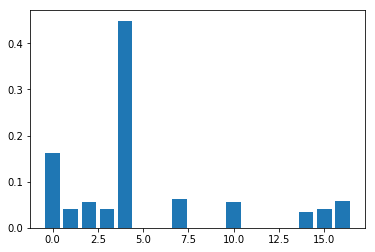

In [19]:
from matplotlib import pyplot
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()